# Q Prepare a prediction model for profit of 50_startups data.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('50_Startups.csv')
# Display the first few rows of the dataset
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [ ]:
# Summary statistics of the numerical columns
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.describe(include=object)

,State
count,50
unique,3
top,New York
freq,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

# to remove duplicated values

In [ ]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [ ]:
#finding missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# encodeng -coverting object data in to numeric column

In [ ]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['State'], dtype='object')

In [ ]:
df[cat_cols]

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [ ]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94
5,131876.90,99814.71,362861.36,2.0,156991.12
6,134615.46,147198.87,127716.82,0.0,156122.51
7,130298.13,145530.06,323876.68,1.0,155752.60
8,120542.52,148718.95,311613.29,2.0,152211.77
9,123334.88,108679.17,304981.62,0.0,149759.96


In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State              float64
Profit             float64
dtype: object

#Analysing data

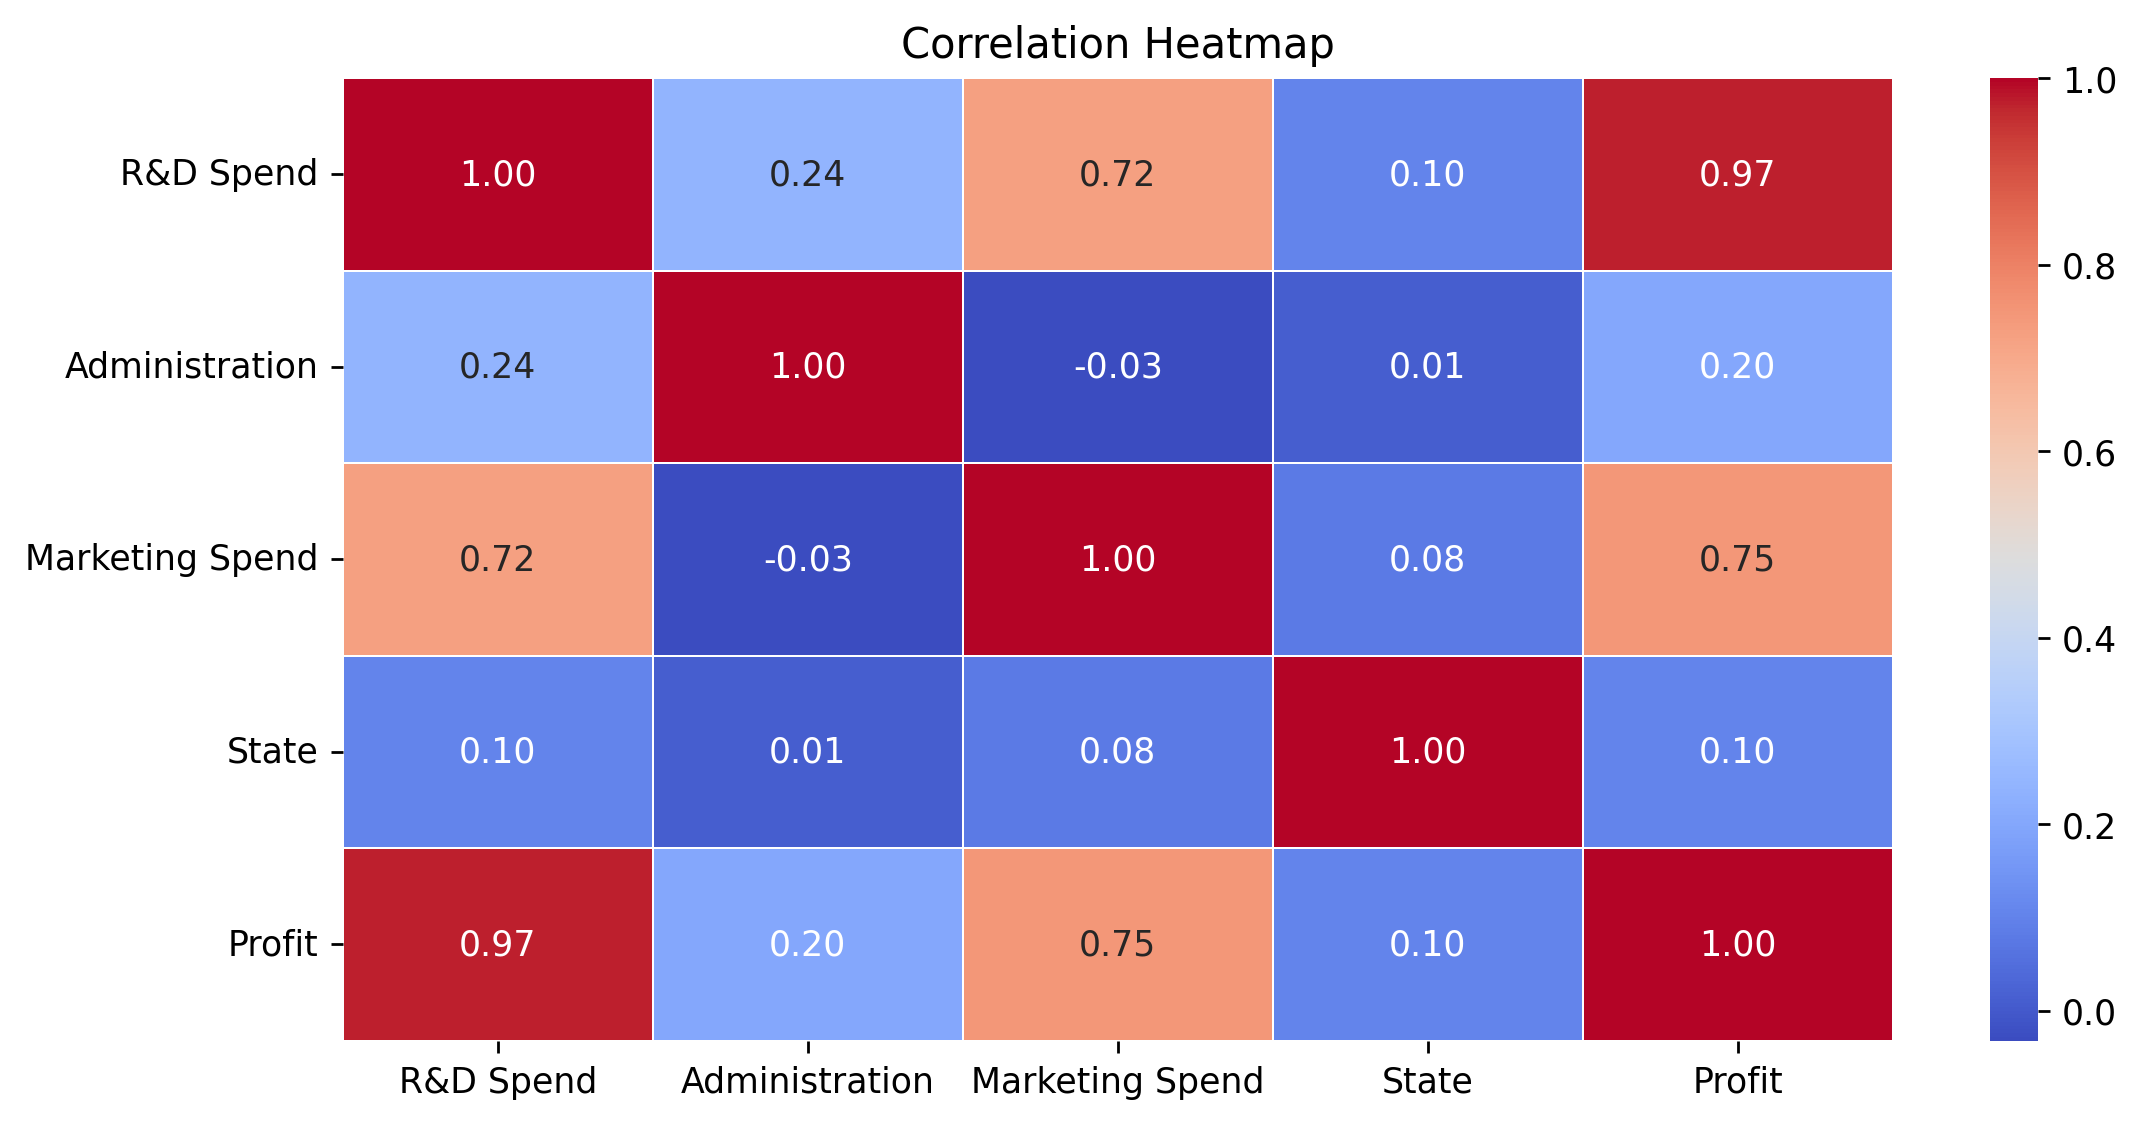

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include="number").corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

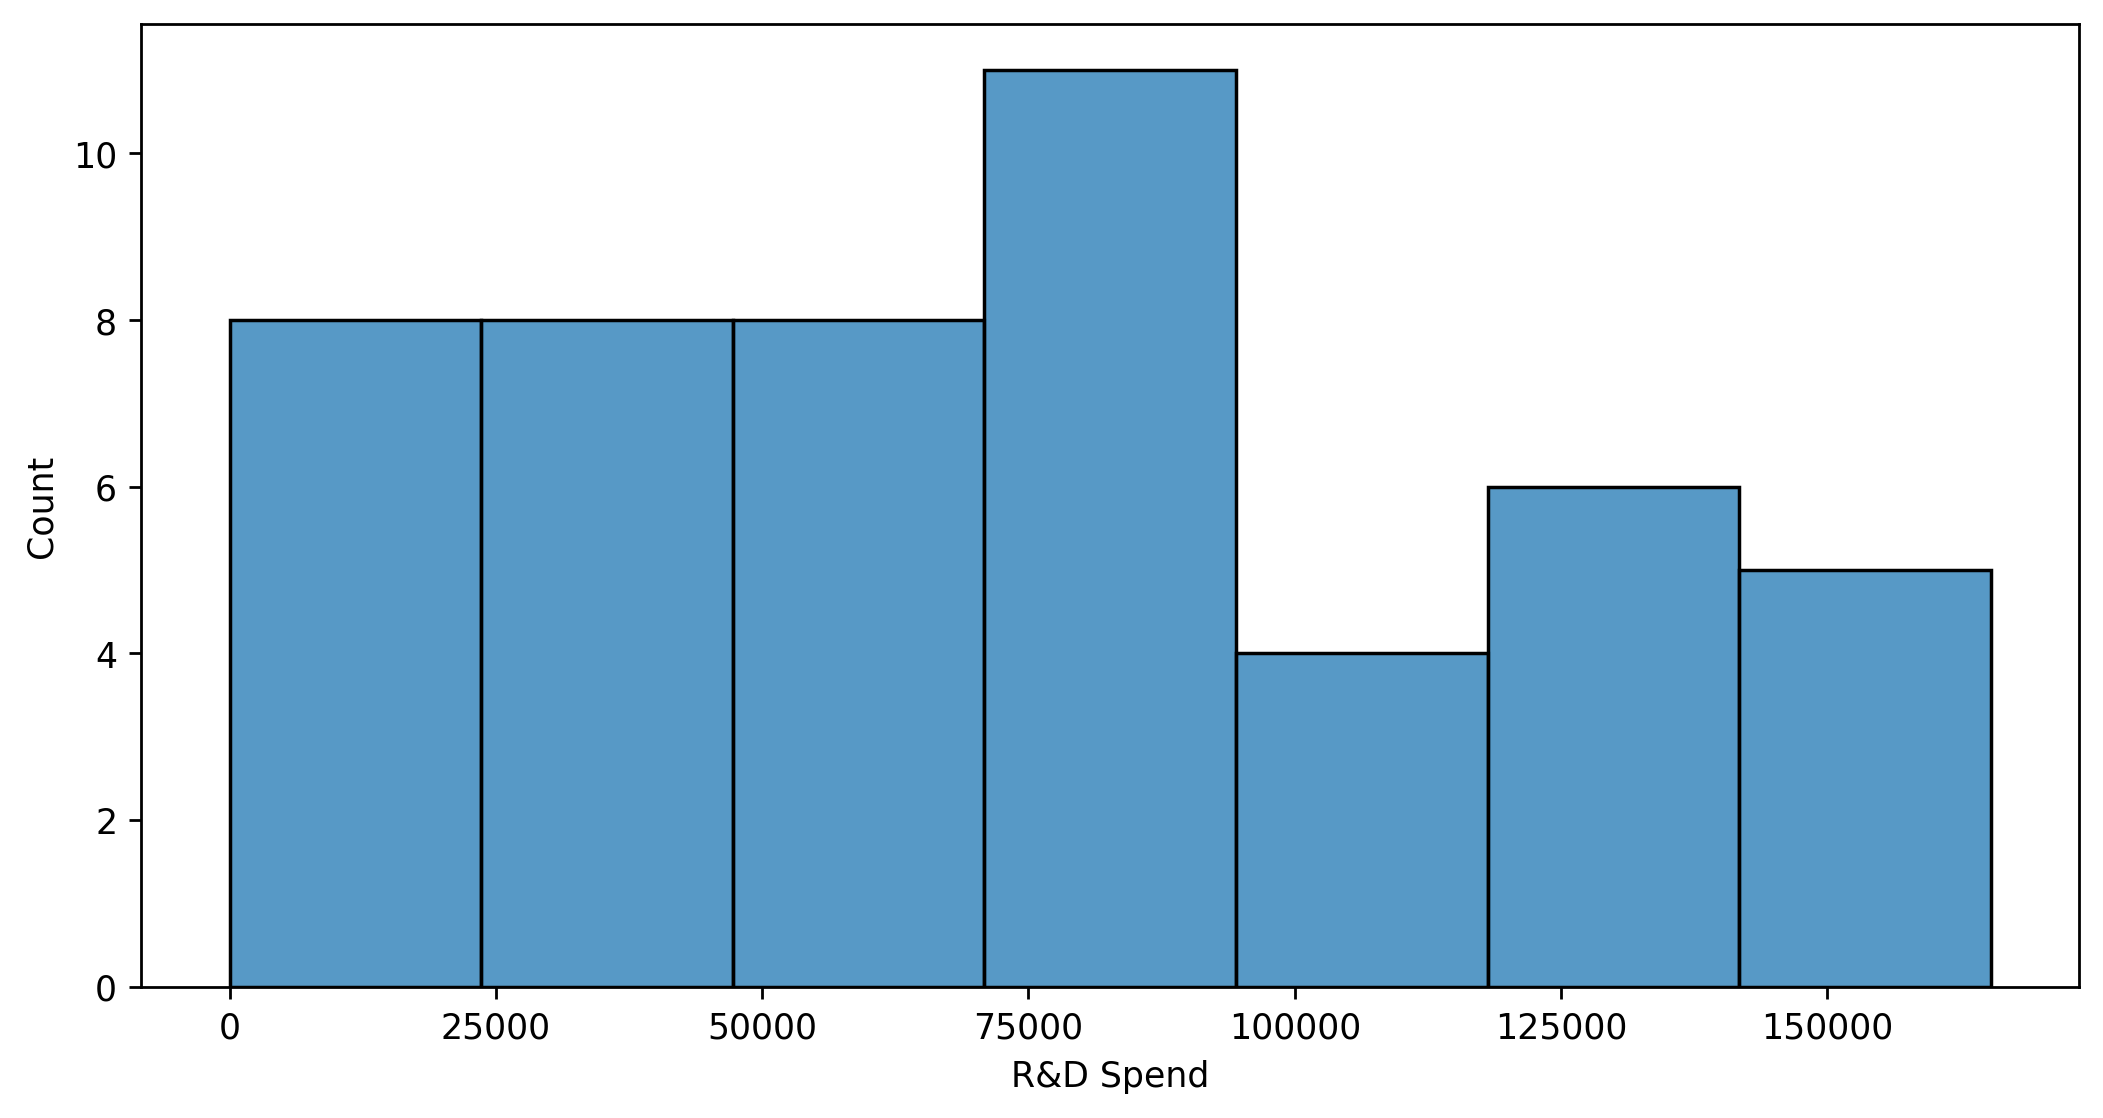

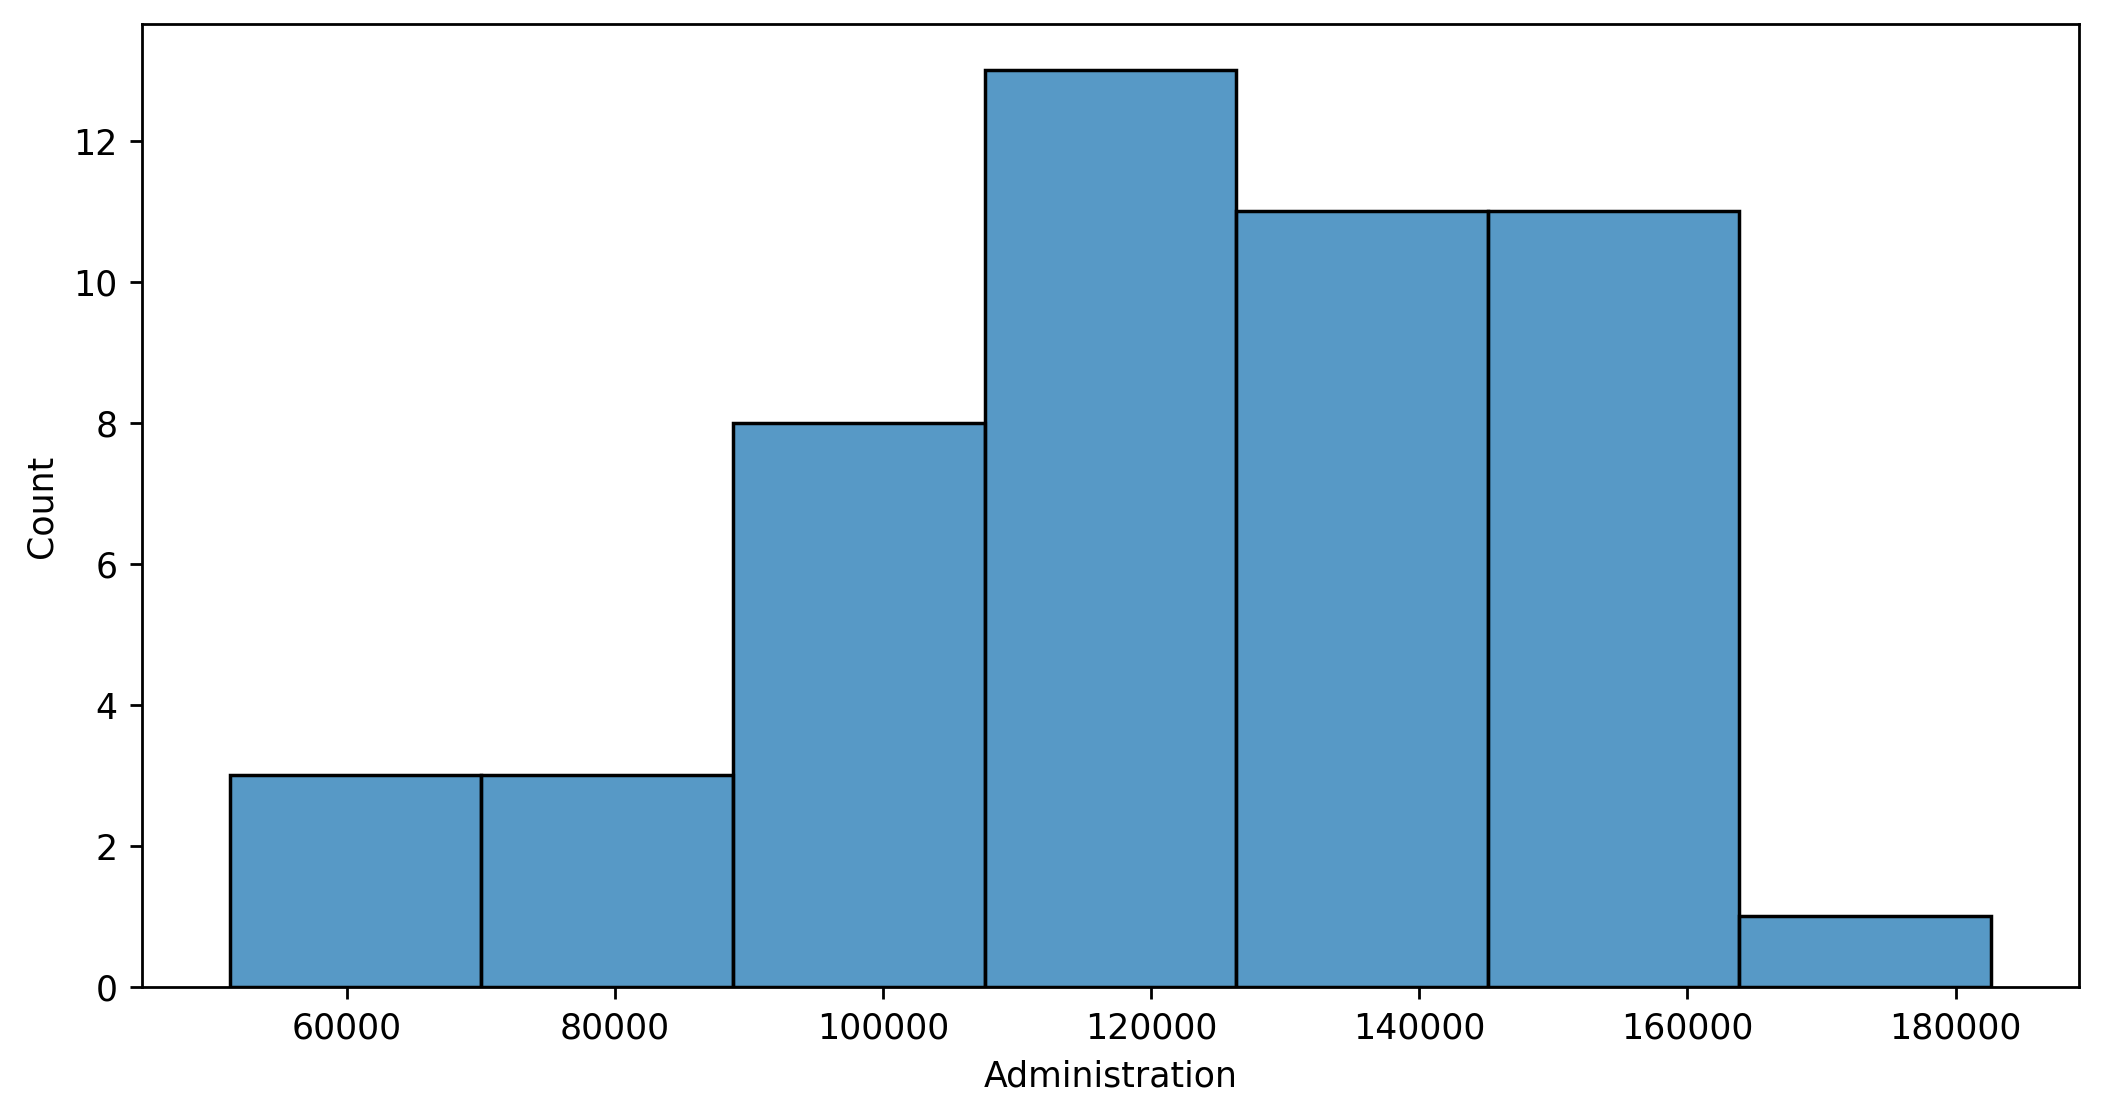

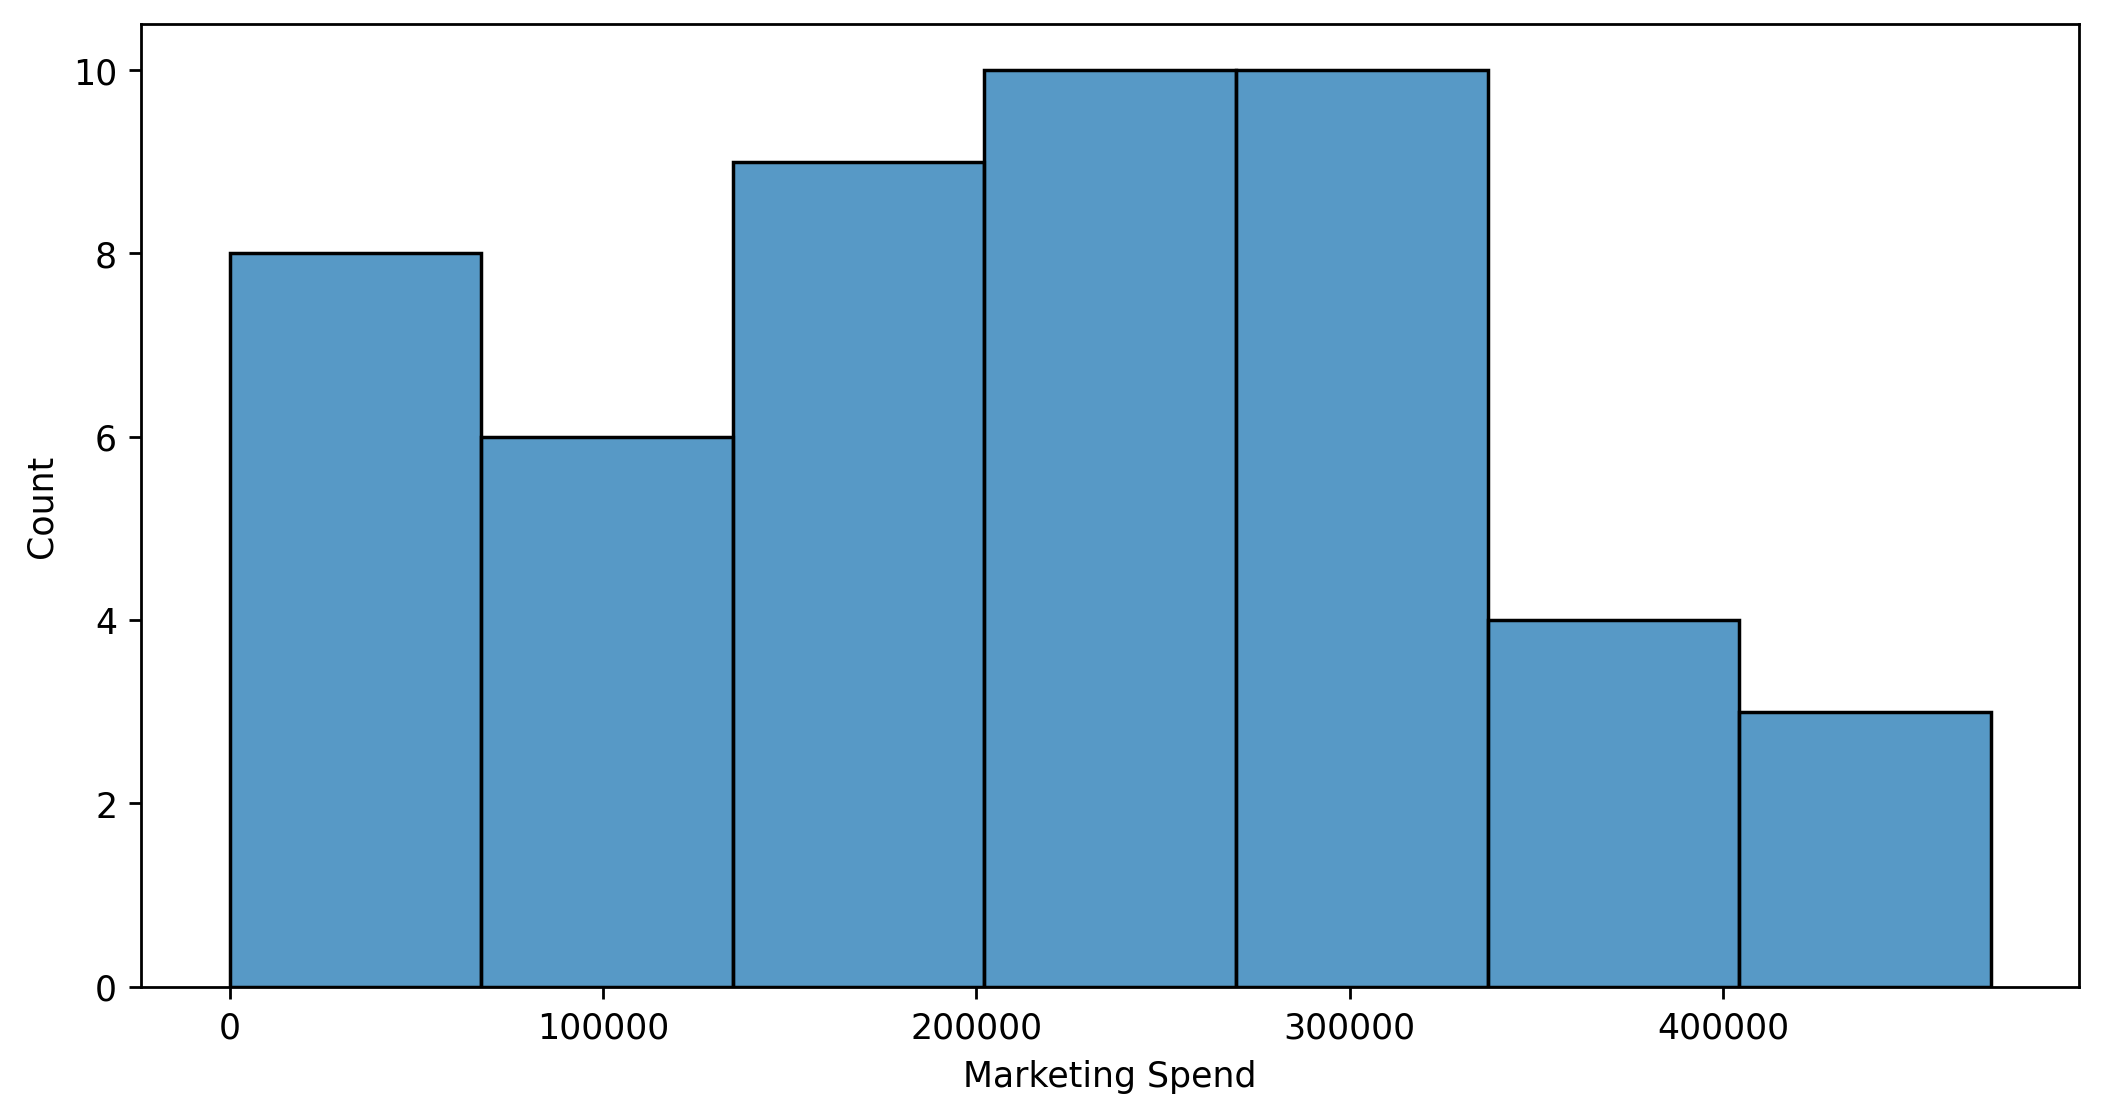

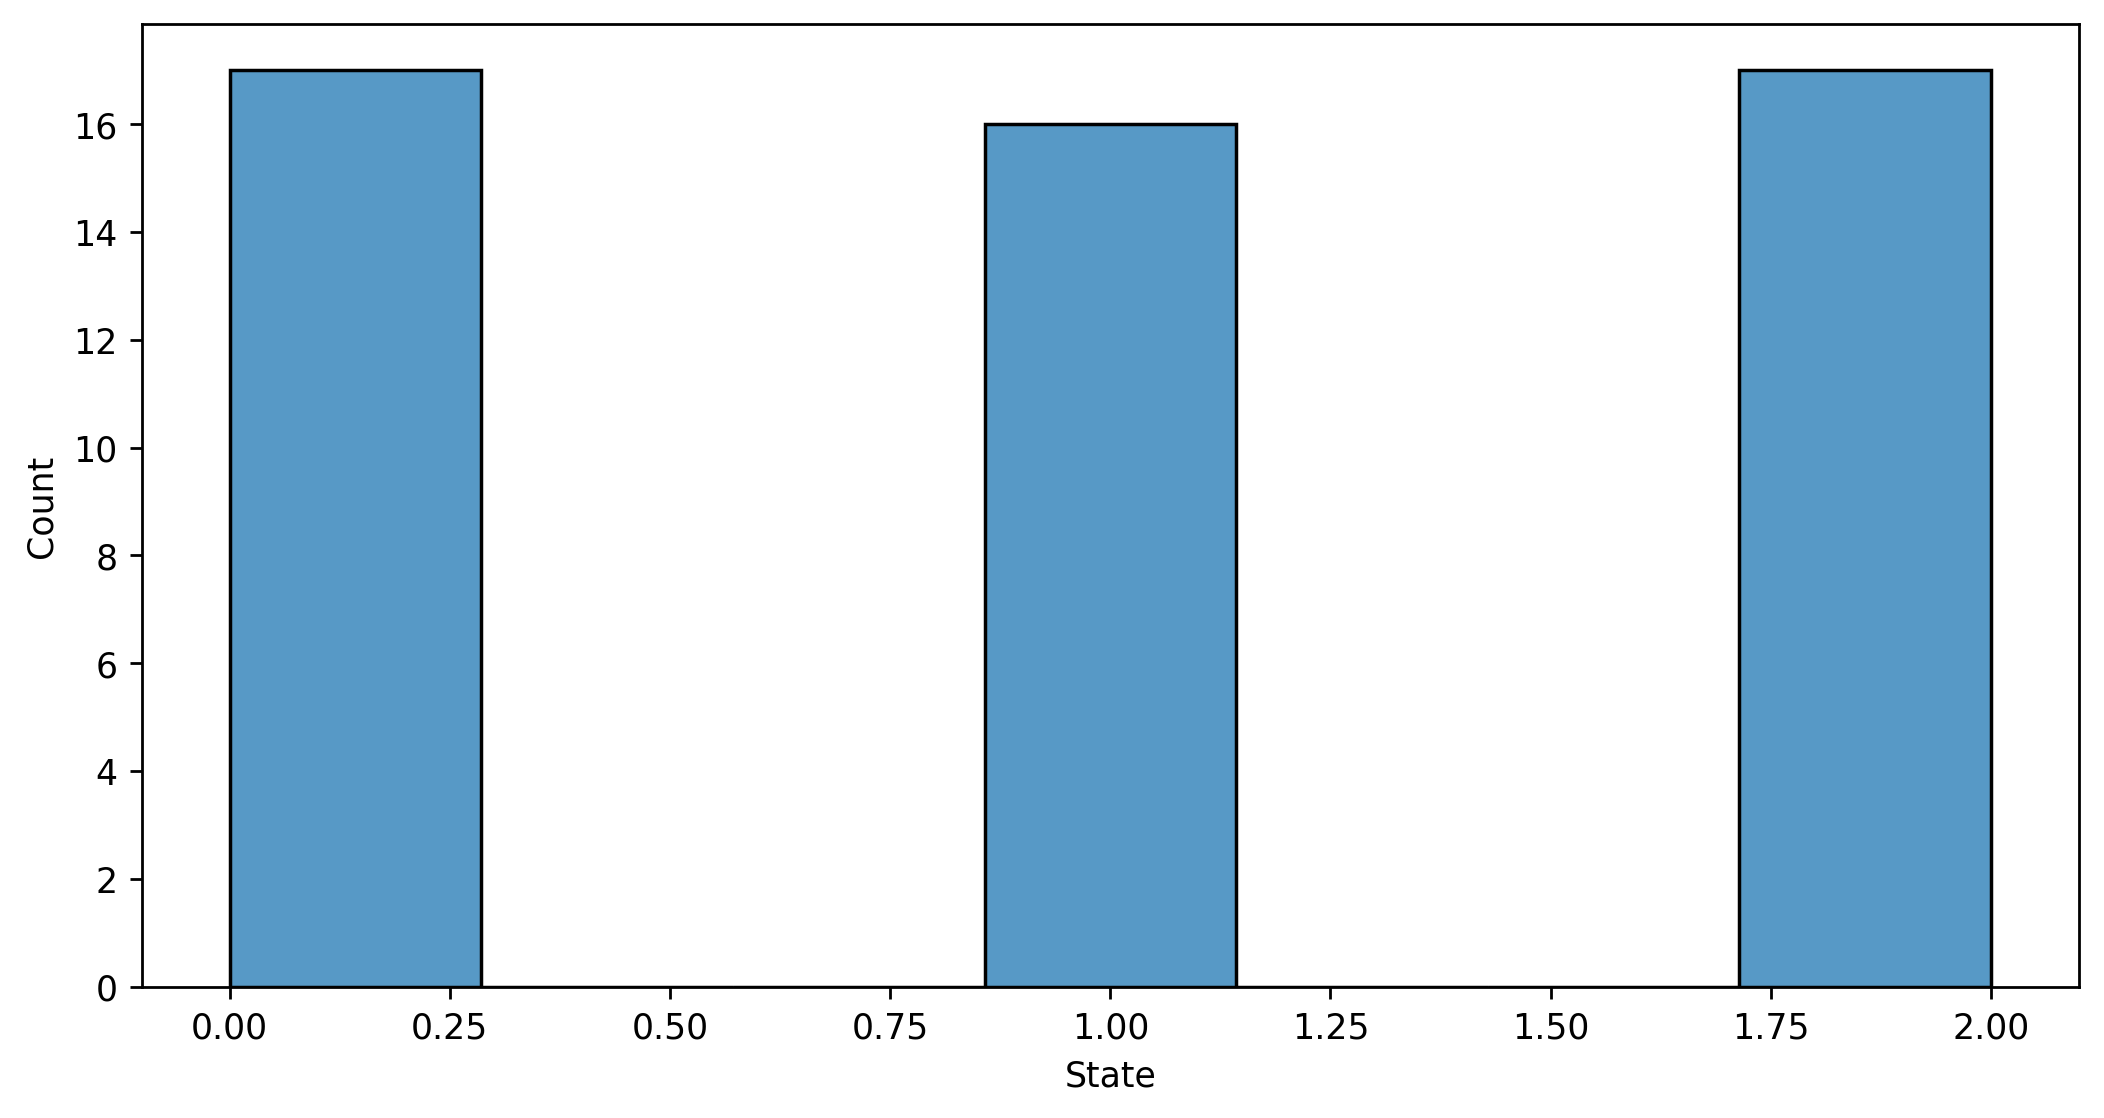

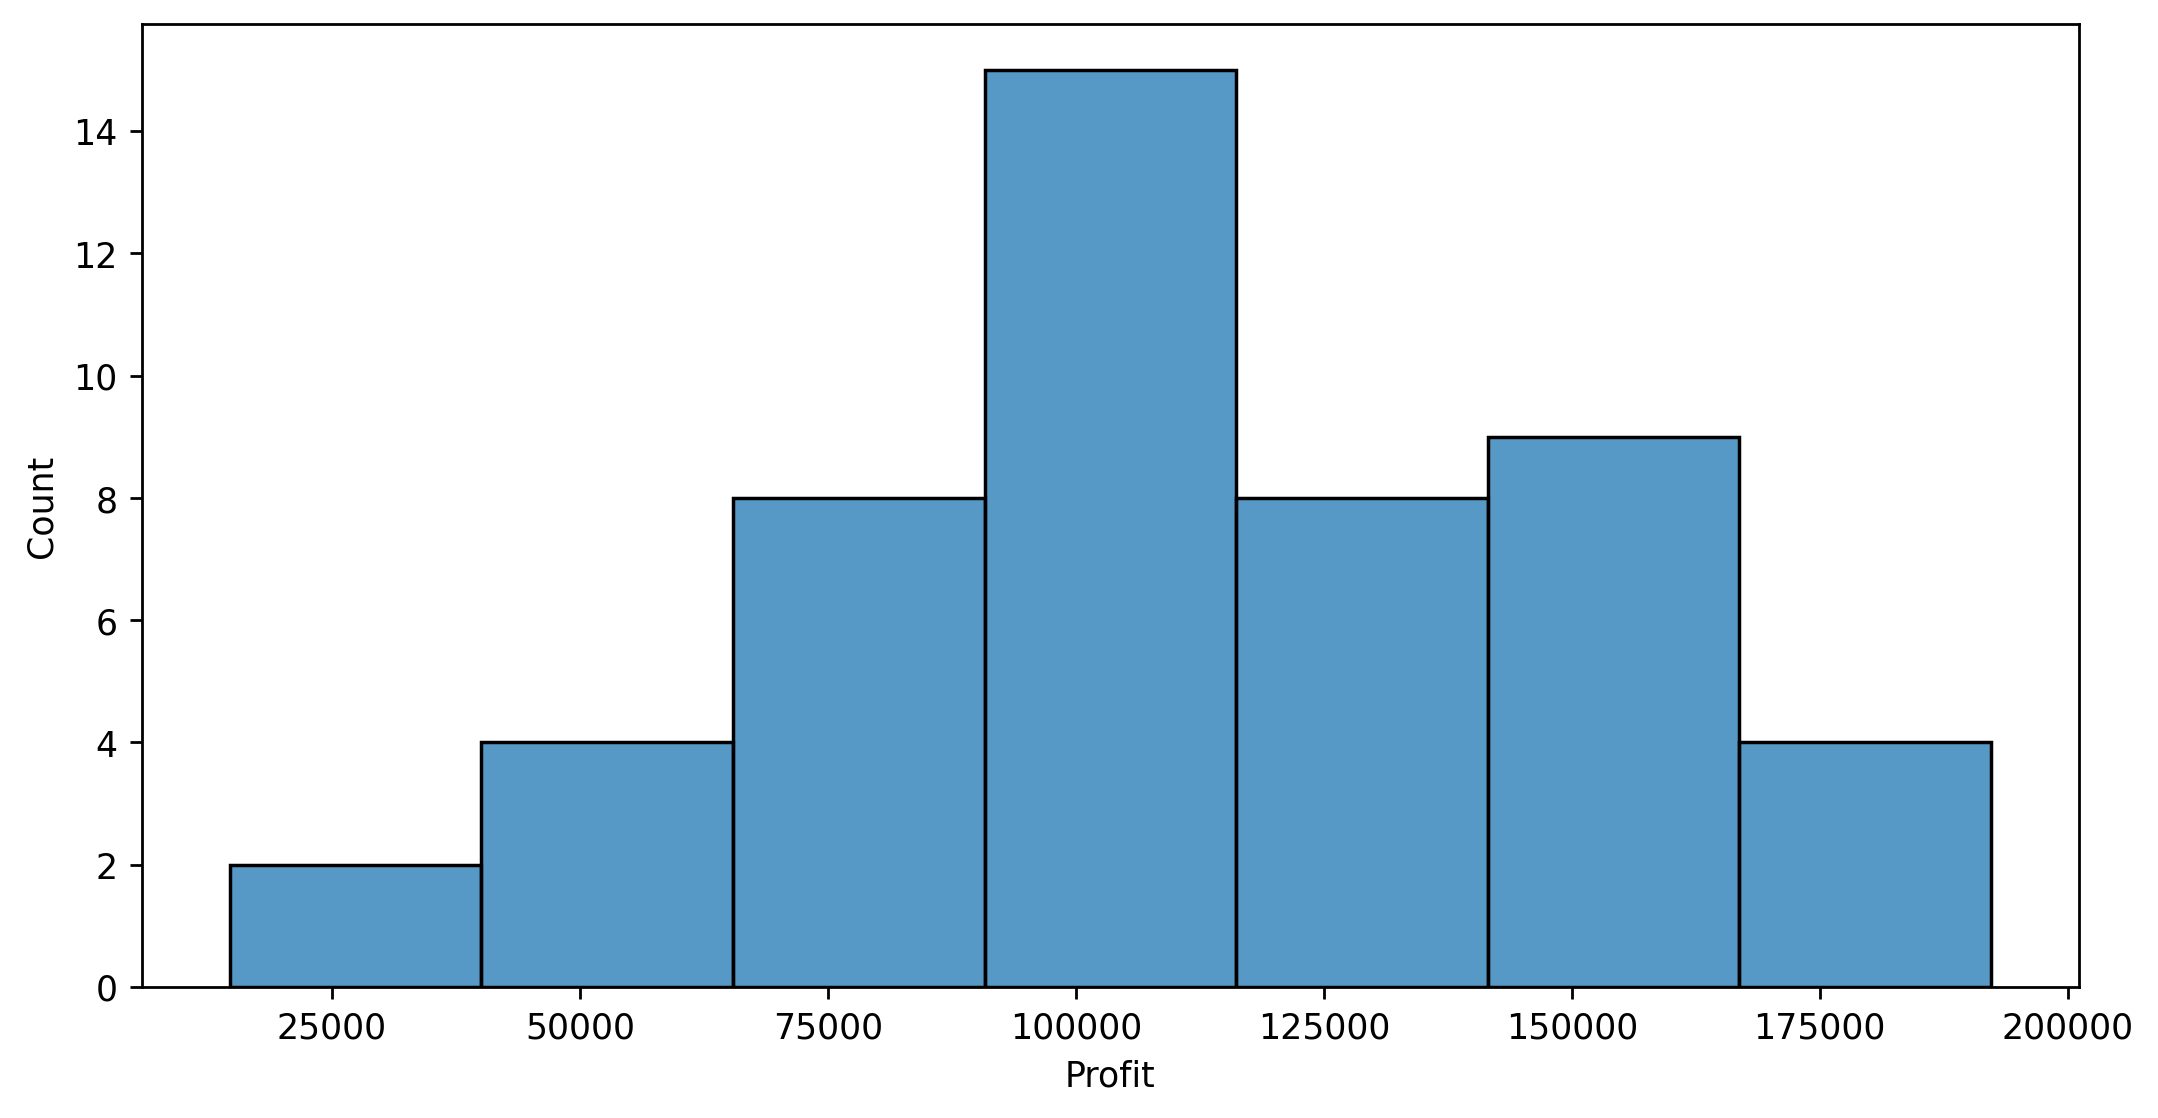

In [ ]:
#Histogram
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [ ]:
#scatterplot to understand relatinship

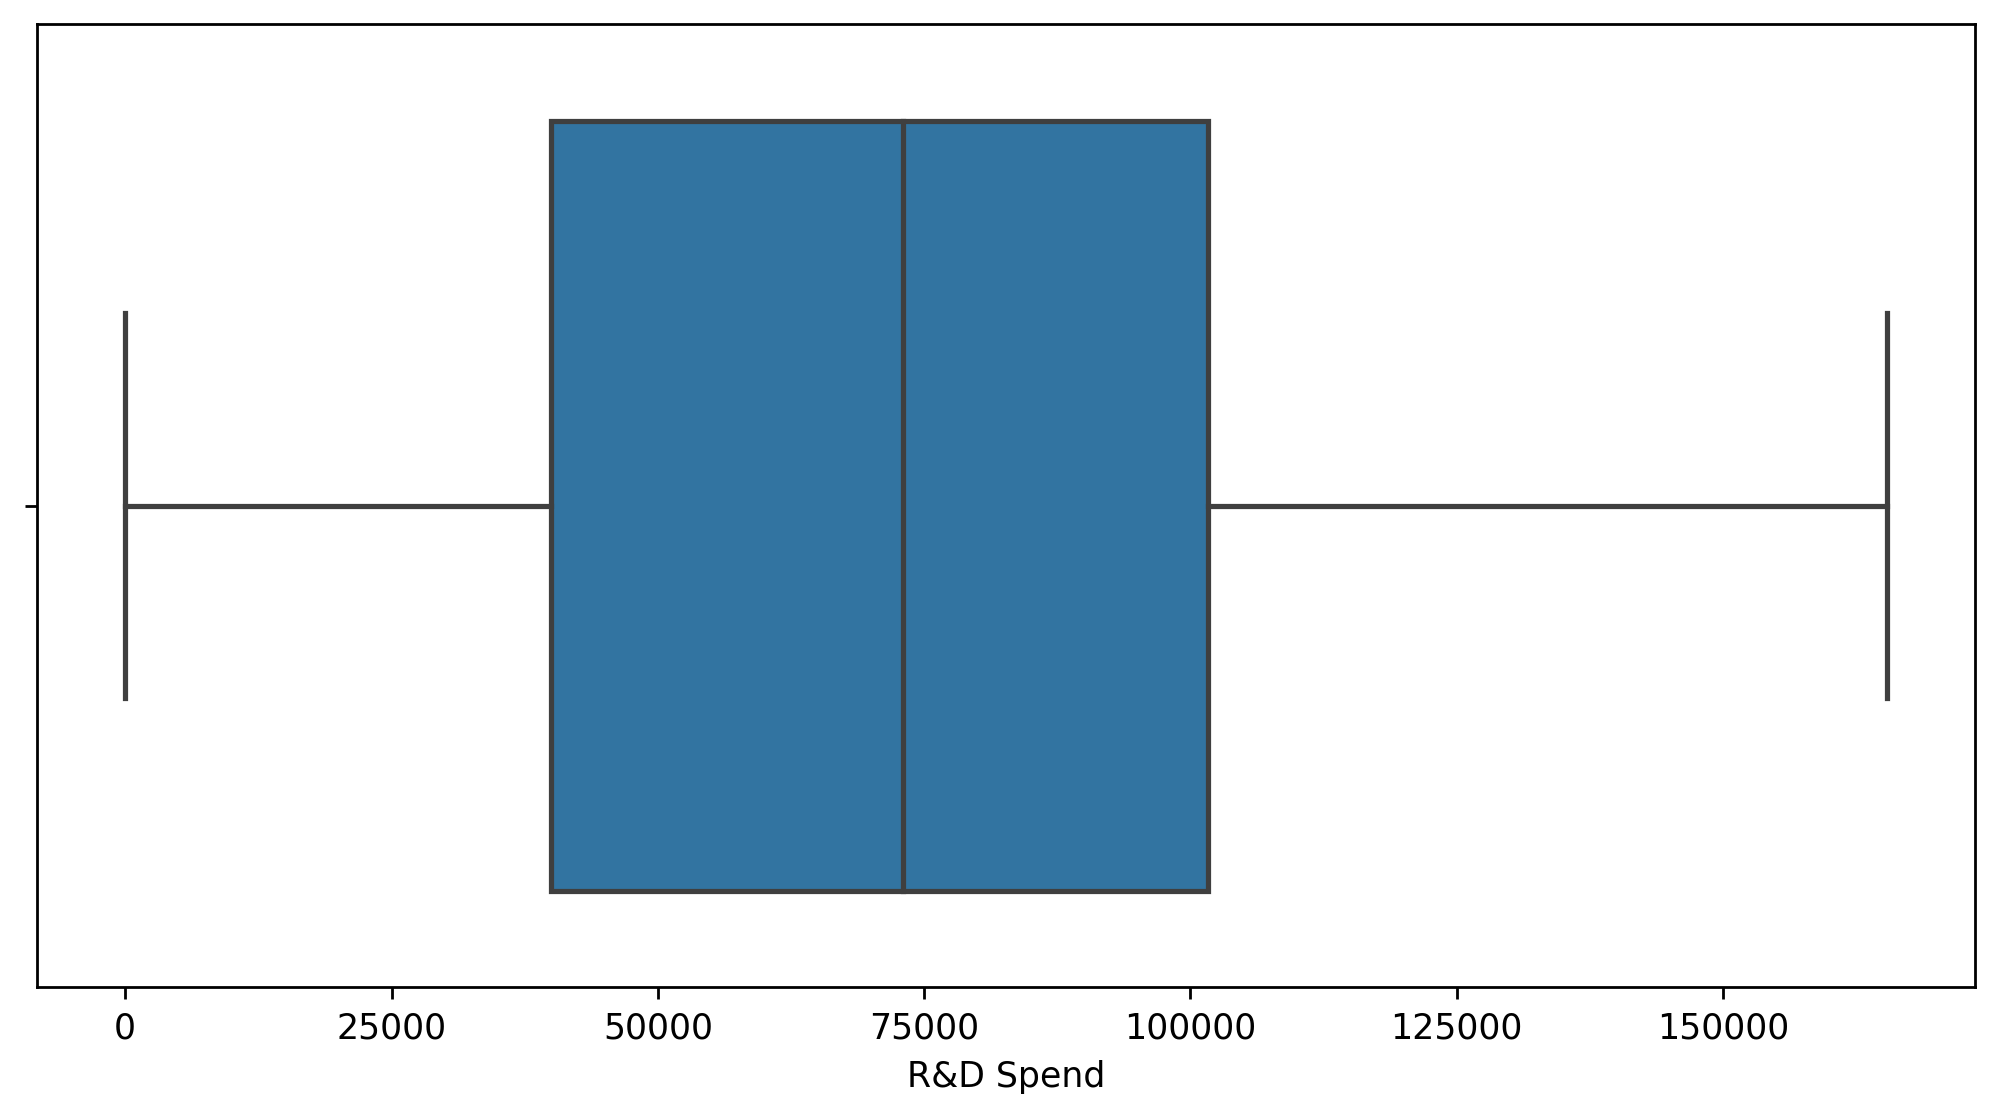

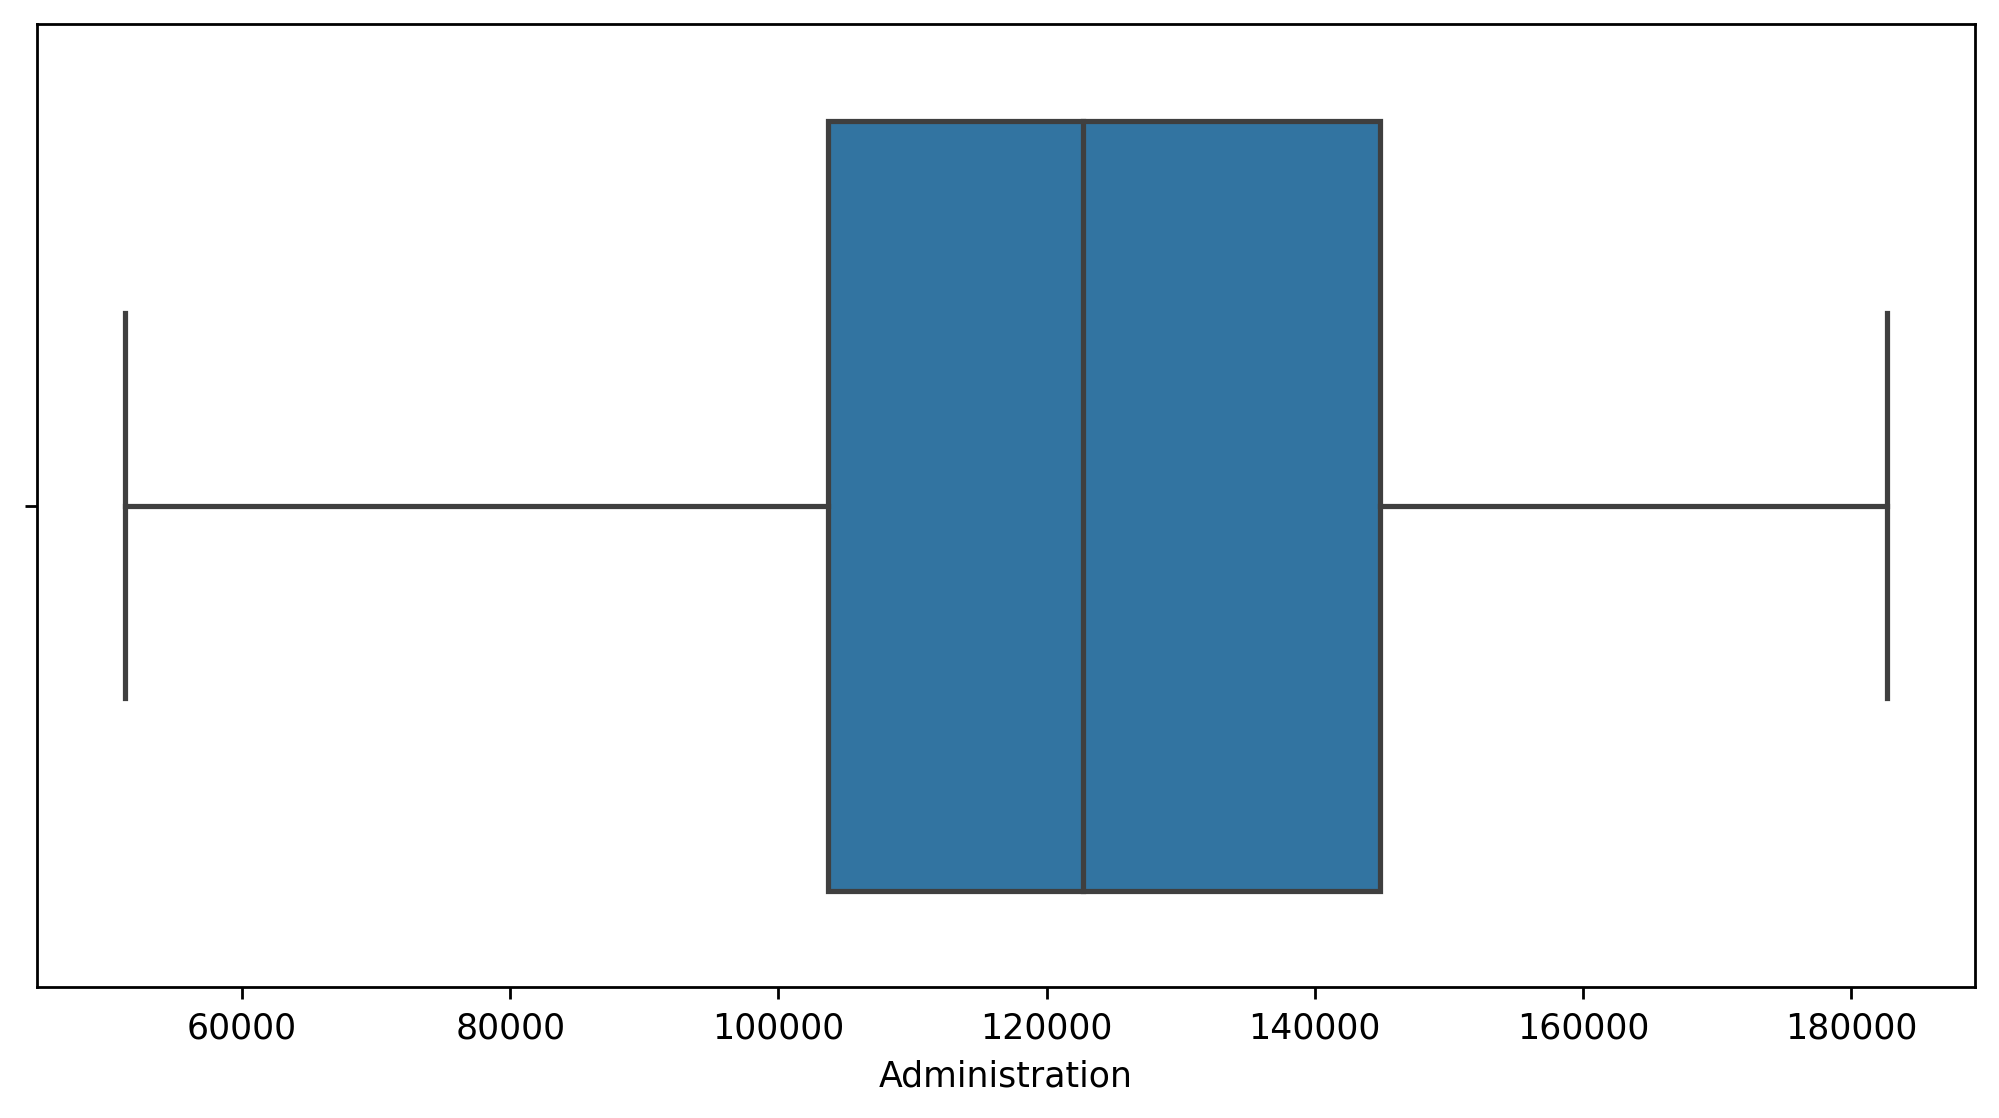

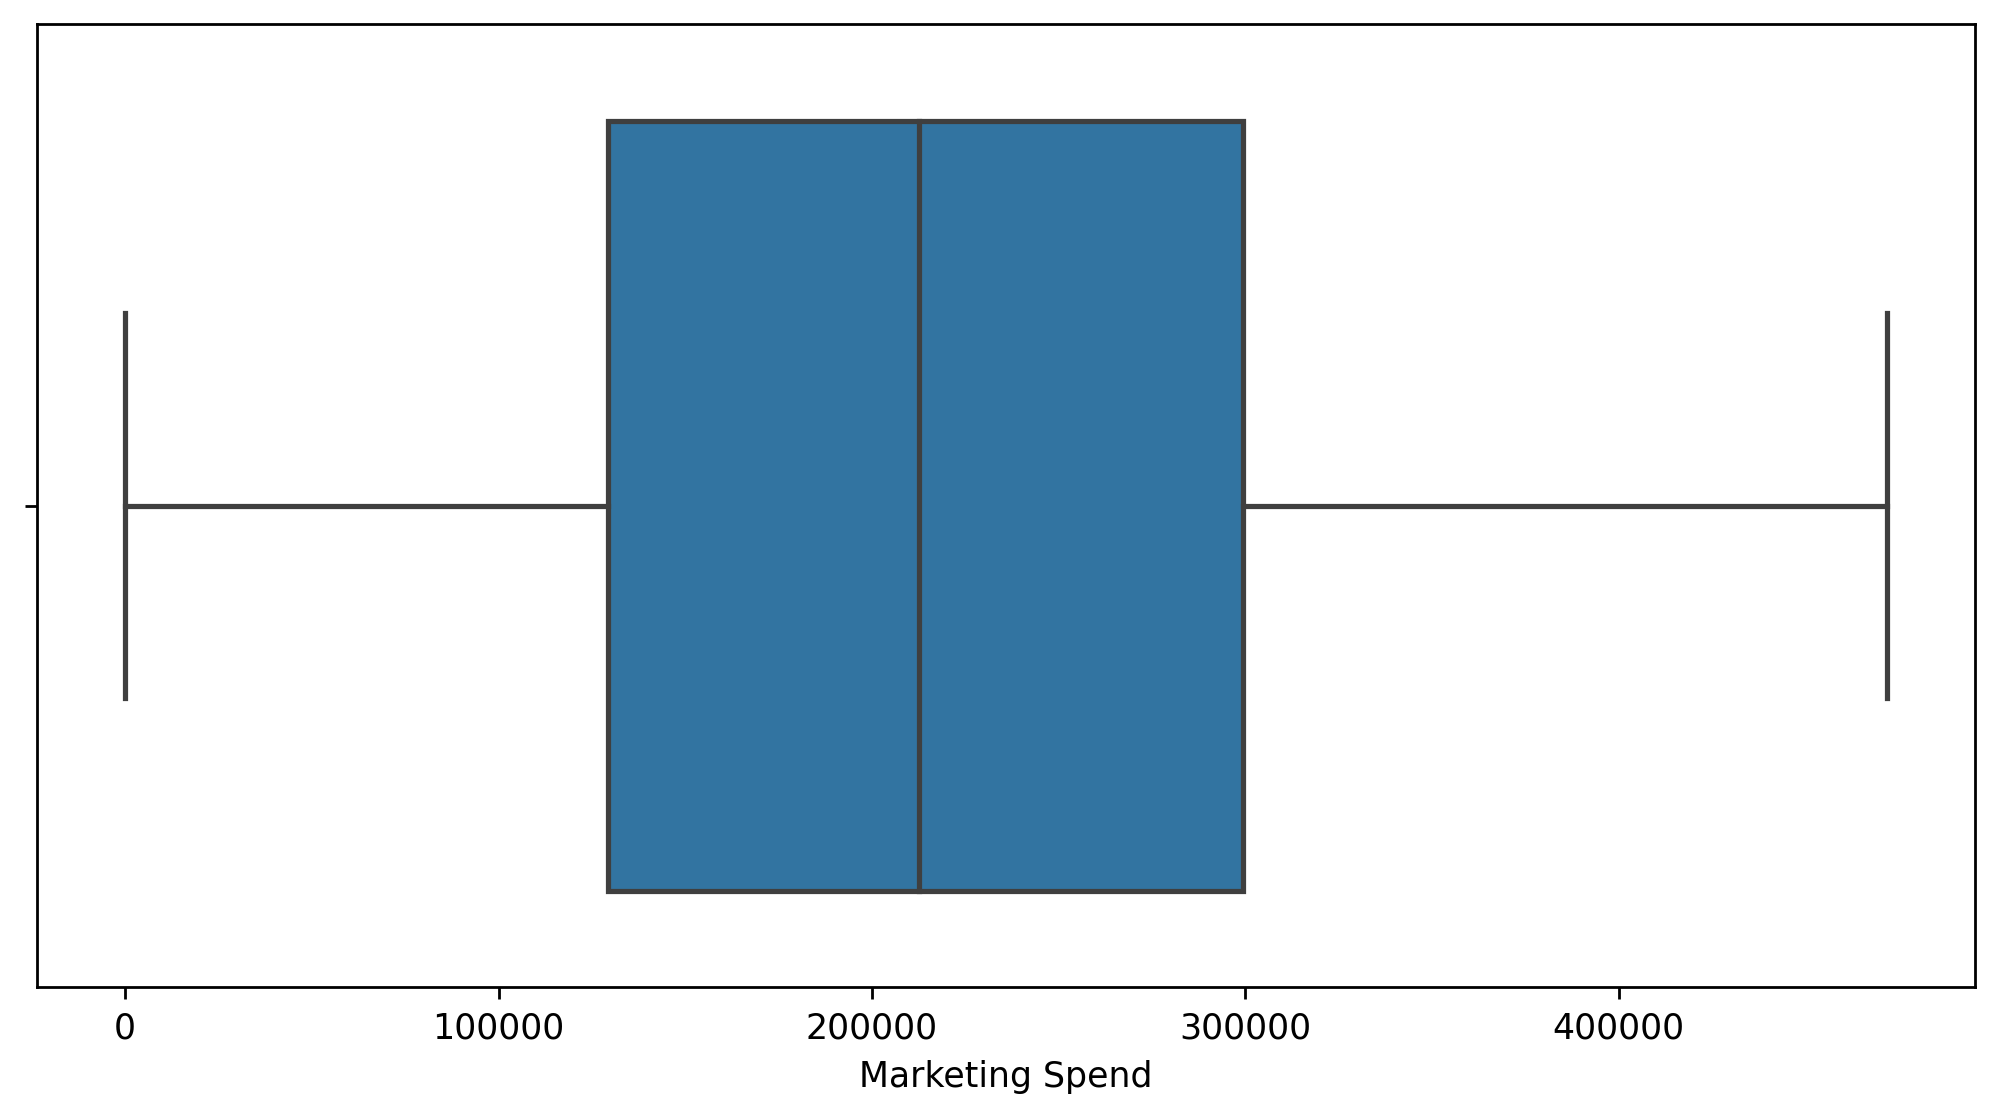

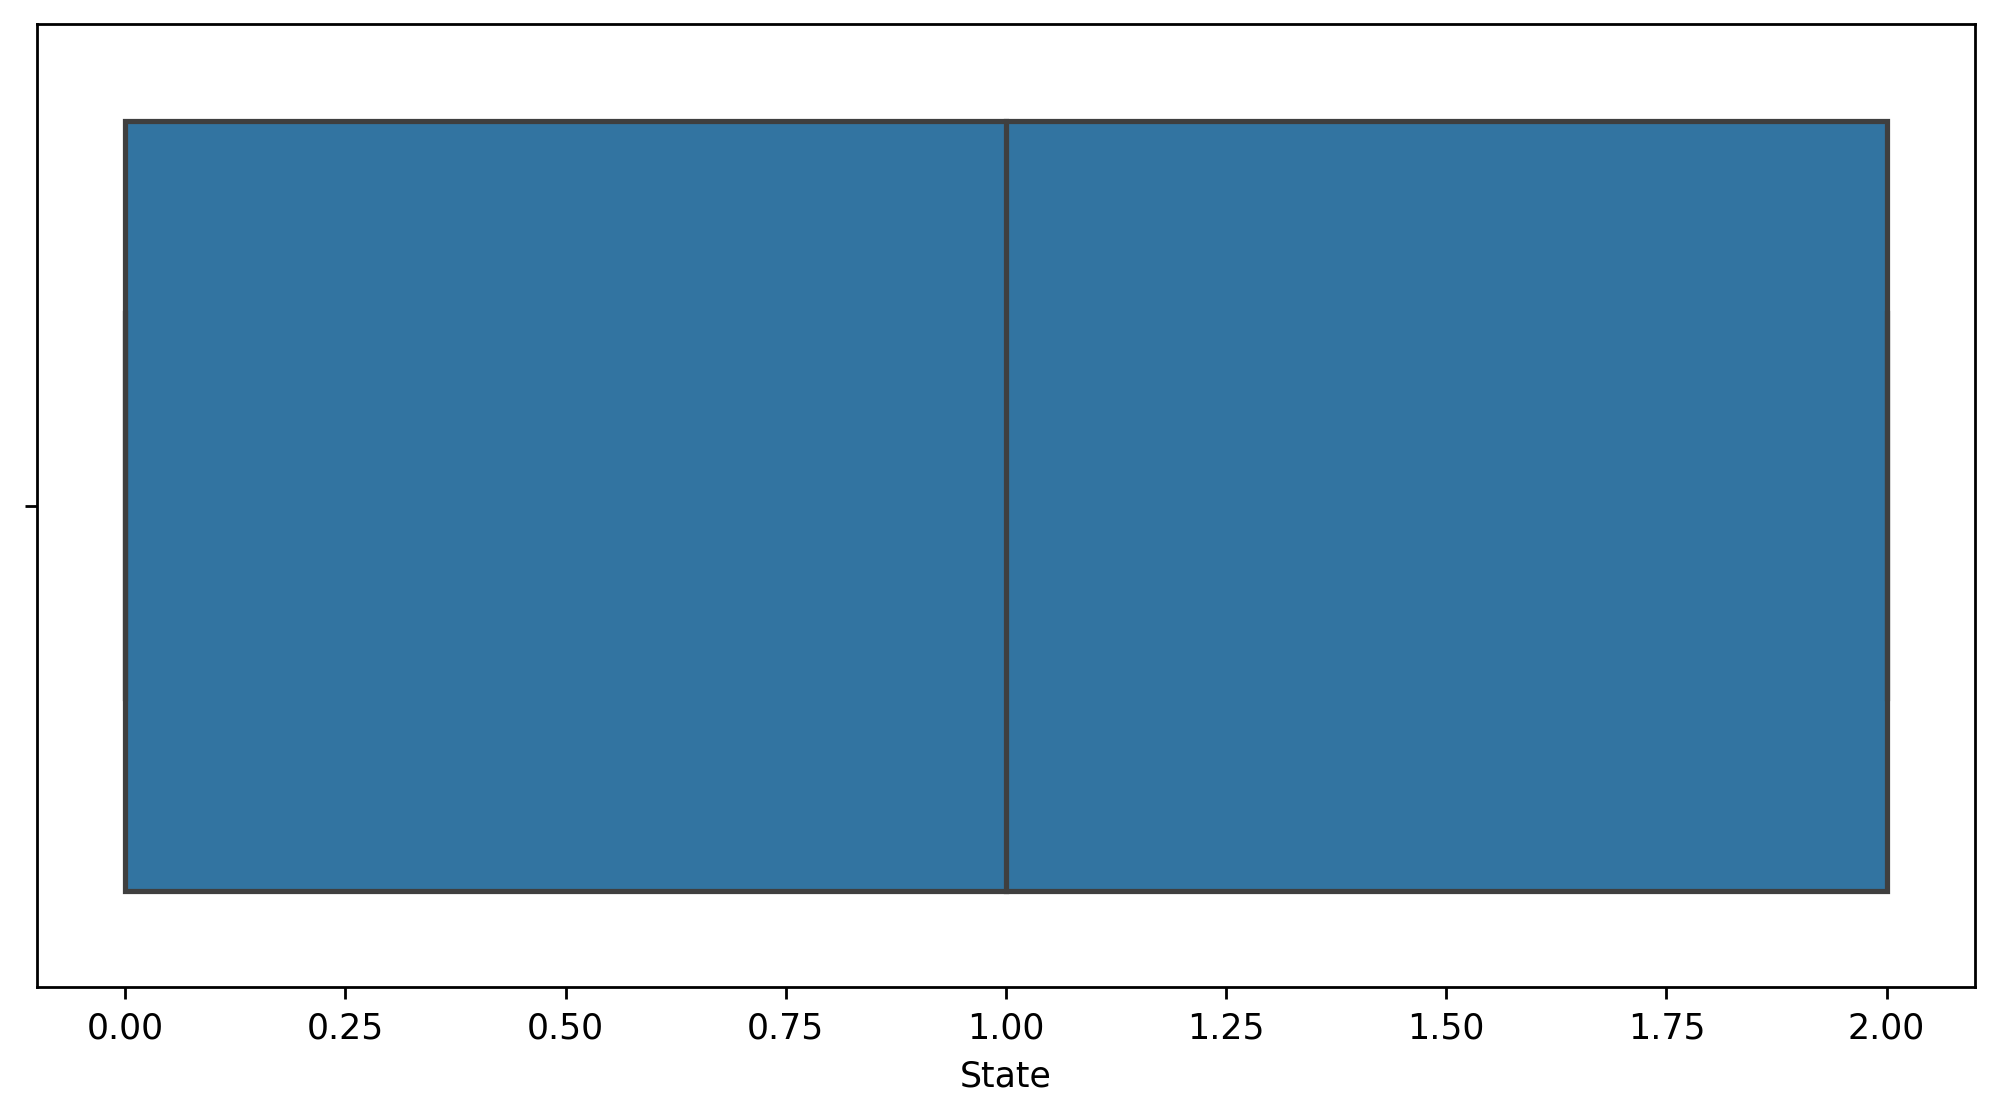

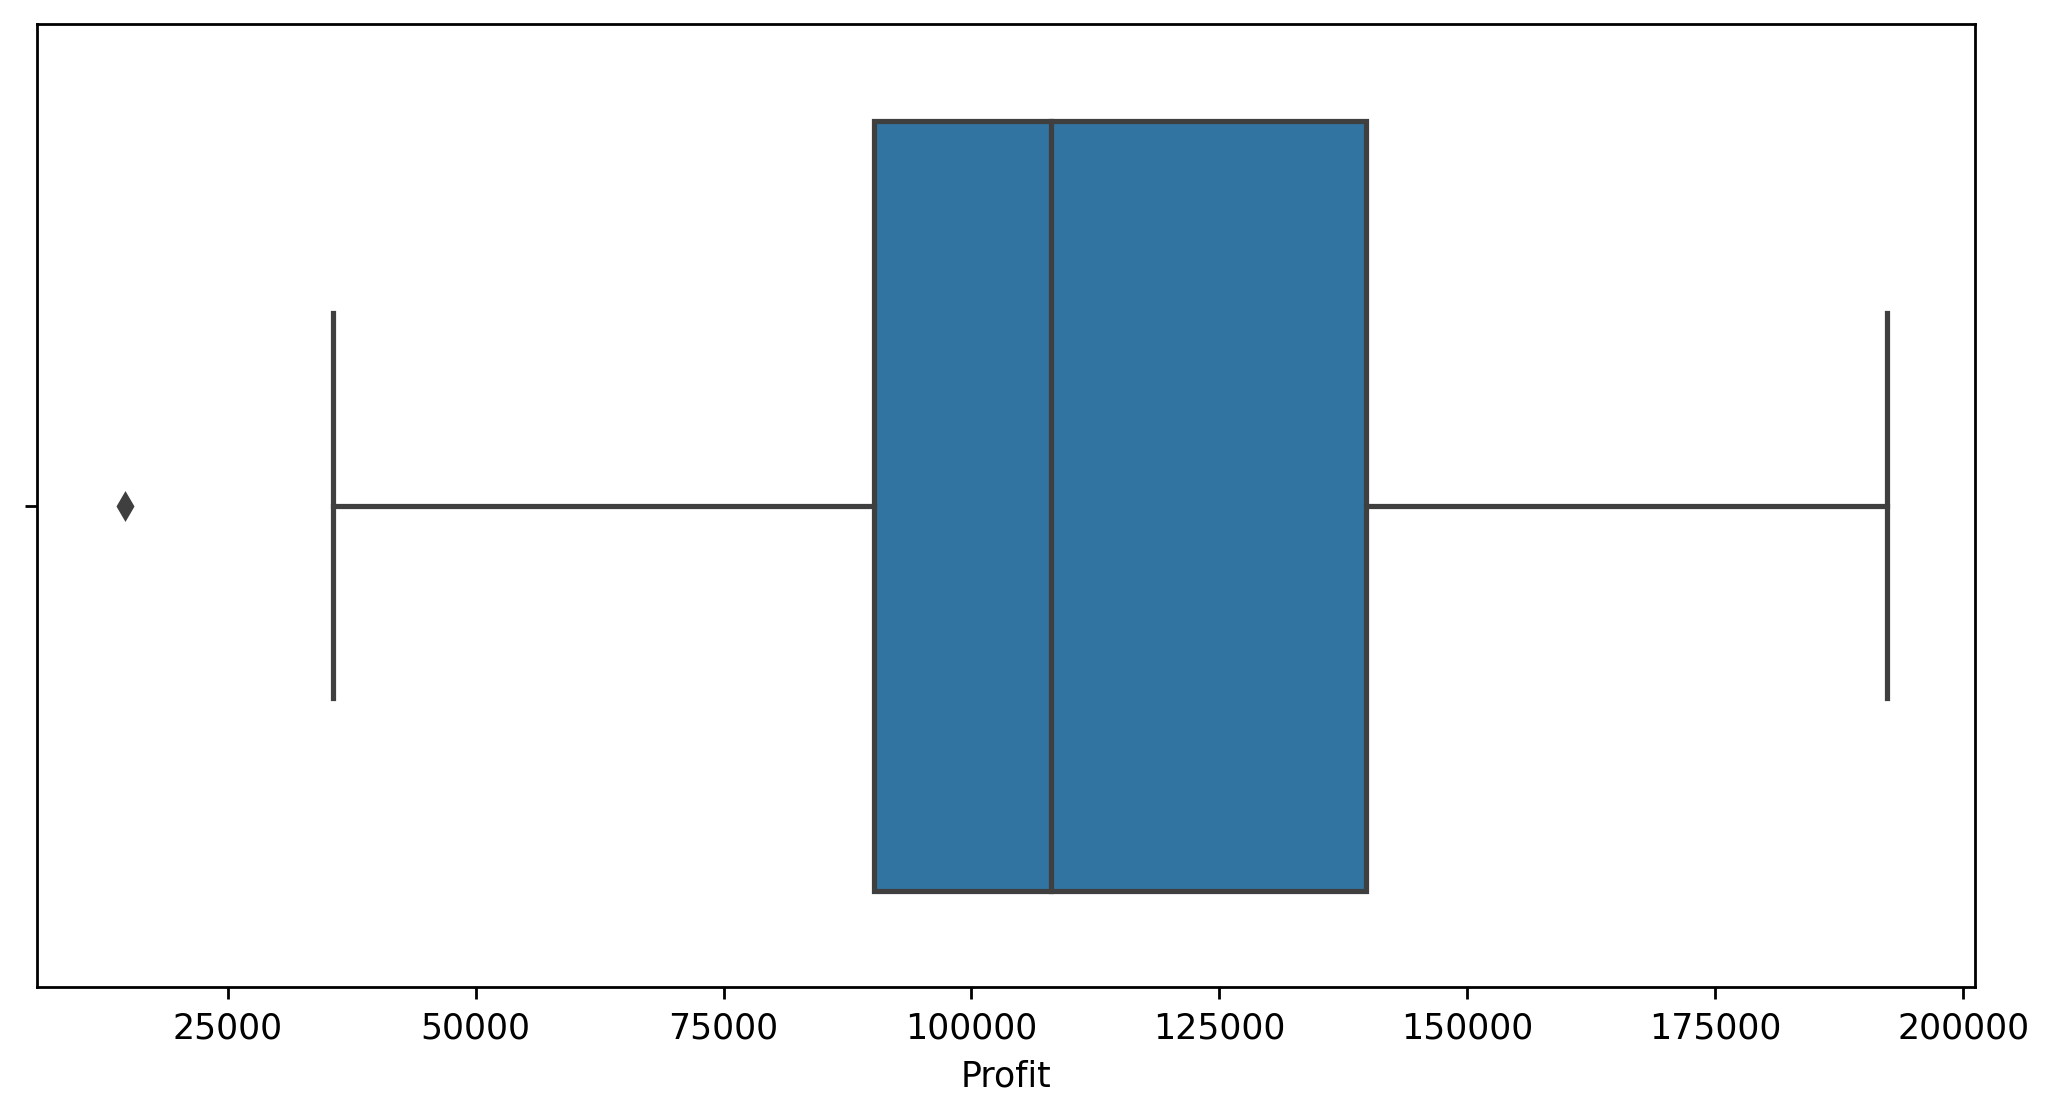

In [ ]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#feature selection

# PPS score

In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=b066e10f63b23012fbc47ed753f38de864ab854e8e8769e32344dd6df02576d4
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as ps

In [ ]:
feature_sel = ps.matrix(df)

In [ ]:
feature_sel[feature_sel['y'] == 'Profit']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
4,R&D Spend,Profit,0.680266,regression,True,mean absolute error,31213.6996,9980.075481,DecisionTreeRegressor()
9,Administration,Profit,0.000000,regression,True,mean absolute error,31213.6996,34434.778269,DecisionTreeRegressor()
14,Marketing Spend,Profit,0.343682,regression,True,mean absolute error,31213.6996,20486.118662,DecisionTreeRegressor()
19,State,Profit,0.000000,regression,True,mean absolute error,31213.6996,31944.978632,DecisionTreeRegressor()
24,Profit,Profit,1.000000,predict_itself,True,None,0.0000,1.000000,None


# Tree Based method

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming x and y are your feature matrix and target variable
dt = DecisionTreeRegressor()

dt.fit(x, y)


DecisionTreeRegressor()

In [ ]:
dt.feature_importances_

array([9.70914399e-01, 7.30777607e-03, 2.09401726e-02, 8.37652348e-04])

In [ ]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [ ]:
ig_sel

,IG,Features
0,0.970914,R&D Spend
1,0.007308,Administration
2,0.020940,Marketing Spend
3,0.000838,State


In [ ]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
0,0.970914,R&D Spend
2,0.020940,Marketing Spend
1,0.007308,Administration
3,0.000838,State


#VIF calculation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Extracting the predictor variables
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]

# Adding a constant for the intercept in the regression model
X = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Displaying the VIF values
print(vif_data)

          Variable       VIF
0            const       NaN
1        R&D Spend  2.468903
2   Administration  1.175091
3  Marketing Spend  2.326773


#model building

In [ ]:
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [ ]:
lr.intercept_

49296.48376651213

In [ ]:
lr.coef_

array([ 7.71026662e-01, -1.41447139e-02,  3.47133854e-02, -2.33476536e+02])

In [ ]:
#accuracy of training and testing data
lr.score(xtrain,ytrain), lr.score(xtest,ytest)

(0.9460584862051975, 0.9534123822700766)

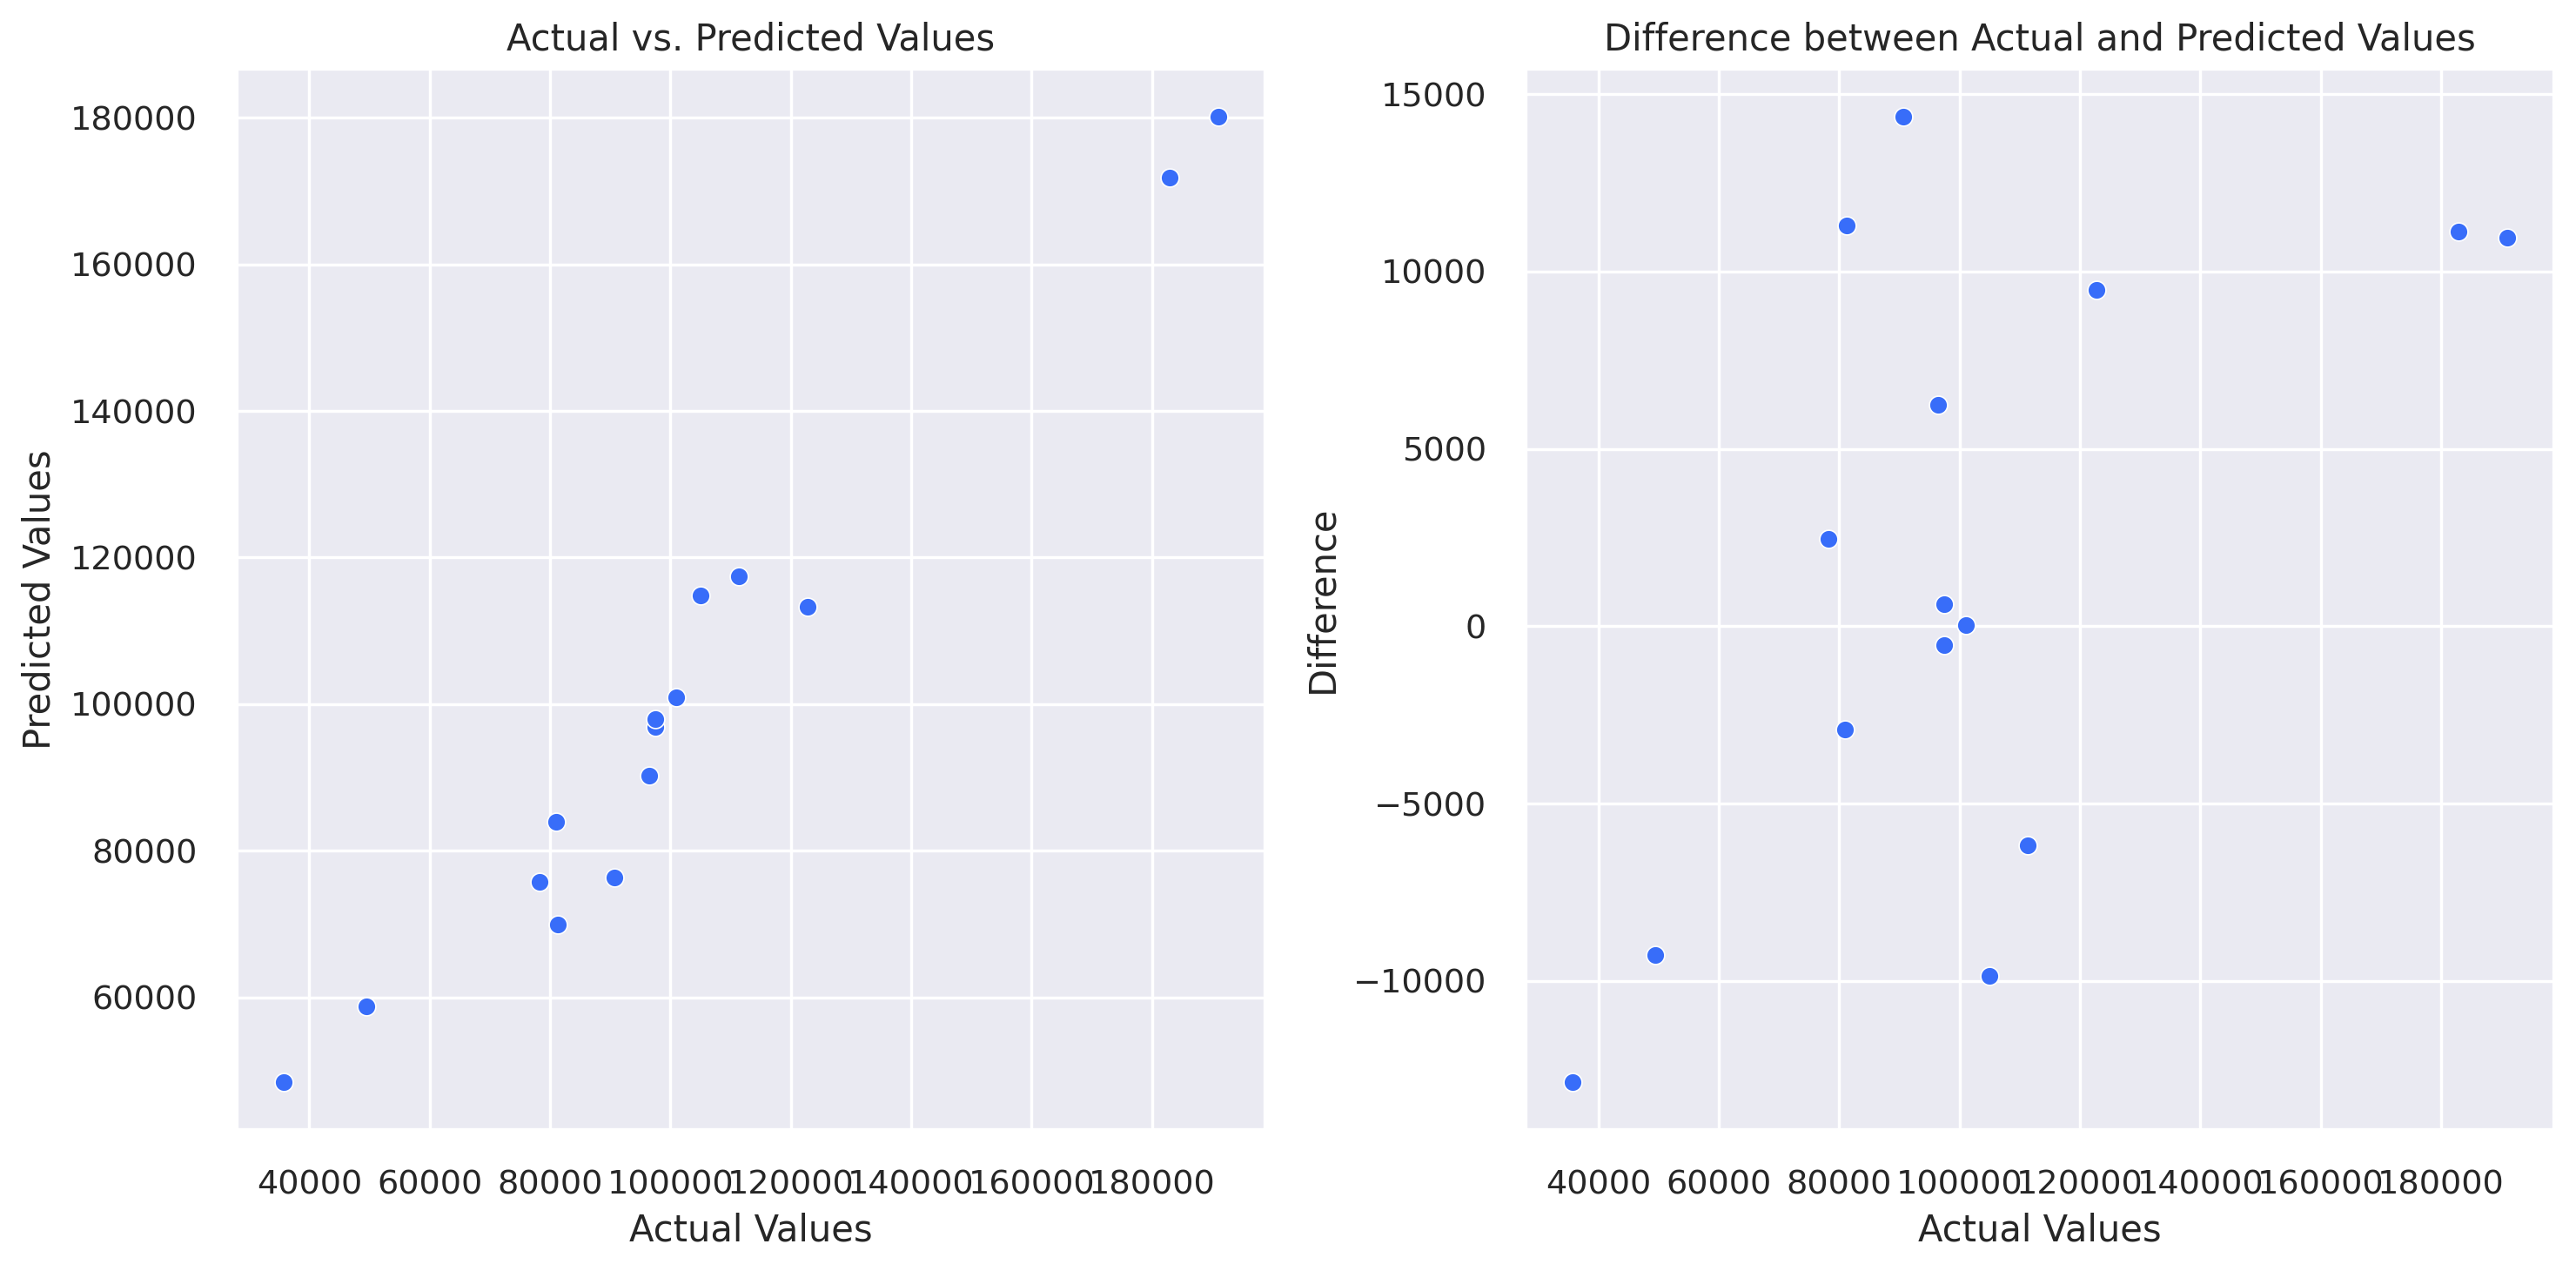

In [ ]:

# Create a DataFrame for better visualization
results = pd.DataFrame({'Actual': ytest, 'Predicted': ypred, 'Difference': ytest - ypred})

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting the difference between actual and predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x='Actual', y='Difference', data=results)
plt.title('Difference between Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Difference')

plt.tight_layout()
plt.show()


In [ ]:
# Display the results DataFrame
print(results)


       Actual      Predicted    Difference
27  105008.31  114878.011063  -9869.701063
35   96479.51   90238.808277   6240.701723
40   78239.91   75788.361571   2451.548429
38   81229.06   69925.448162  11303.611838
2   191050.39  180100.616531  10949.773469
3   182901.99  171768.084785  11133.905215
48   35673.41   48515.573643 -12842.163643
29  101004.64  100967.646113     36.993887
46   49490.75   58752.923570  -9262.173570
31   97483.56   96869.738135    613.821865
32   97427.84   97958.406059   -530.566059
39   81005.76   83927.183247  -2921.423247
21  111313.02  117499.716976  -6186.696976
36   90708.19   76348.149501  14360.040499
19  122776.86  113290.010343   9486.849657


Text(0.5, 1.0, 'Q-Q Plot')

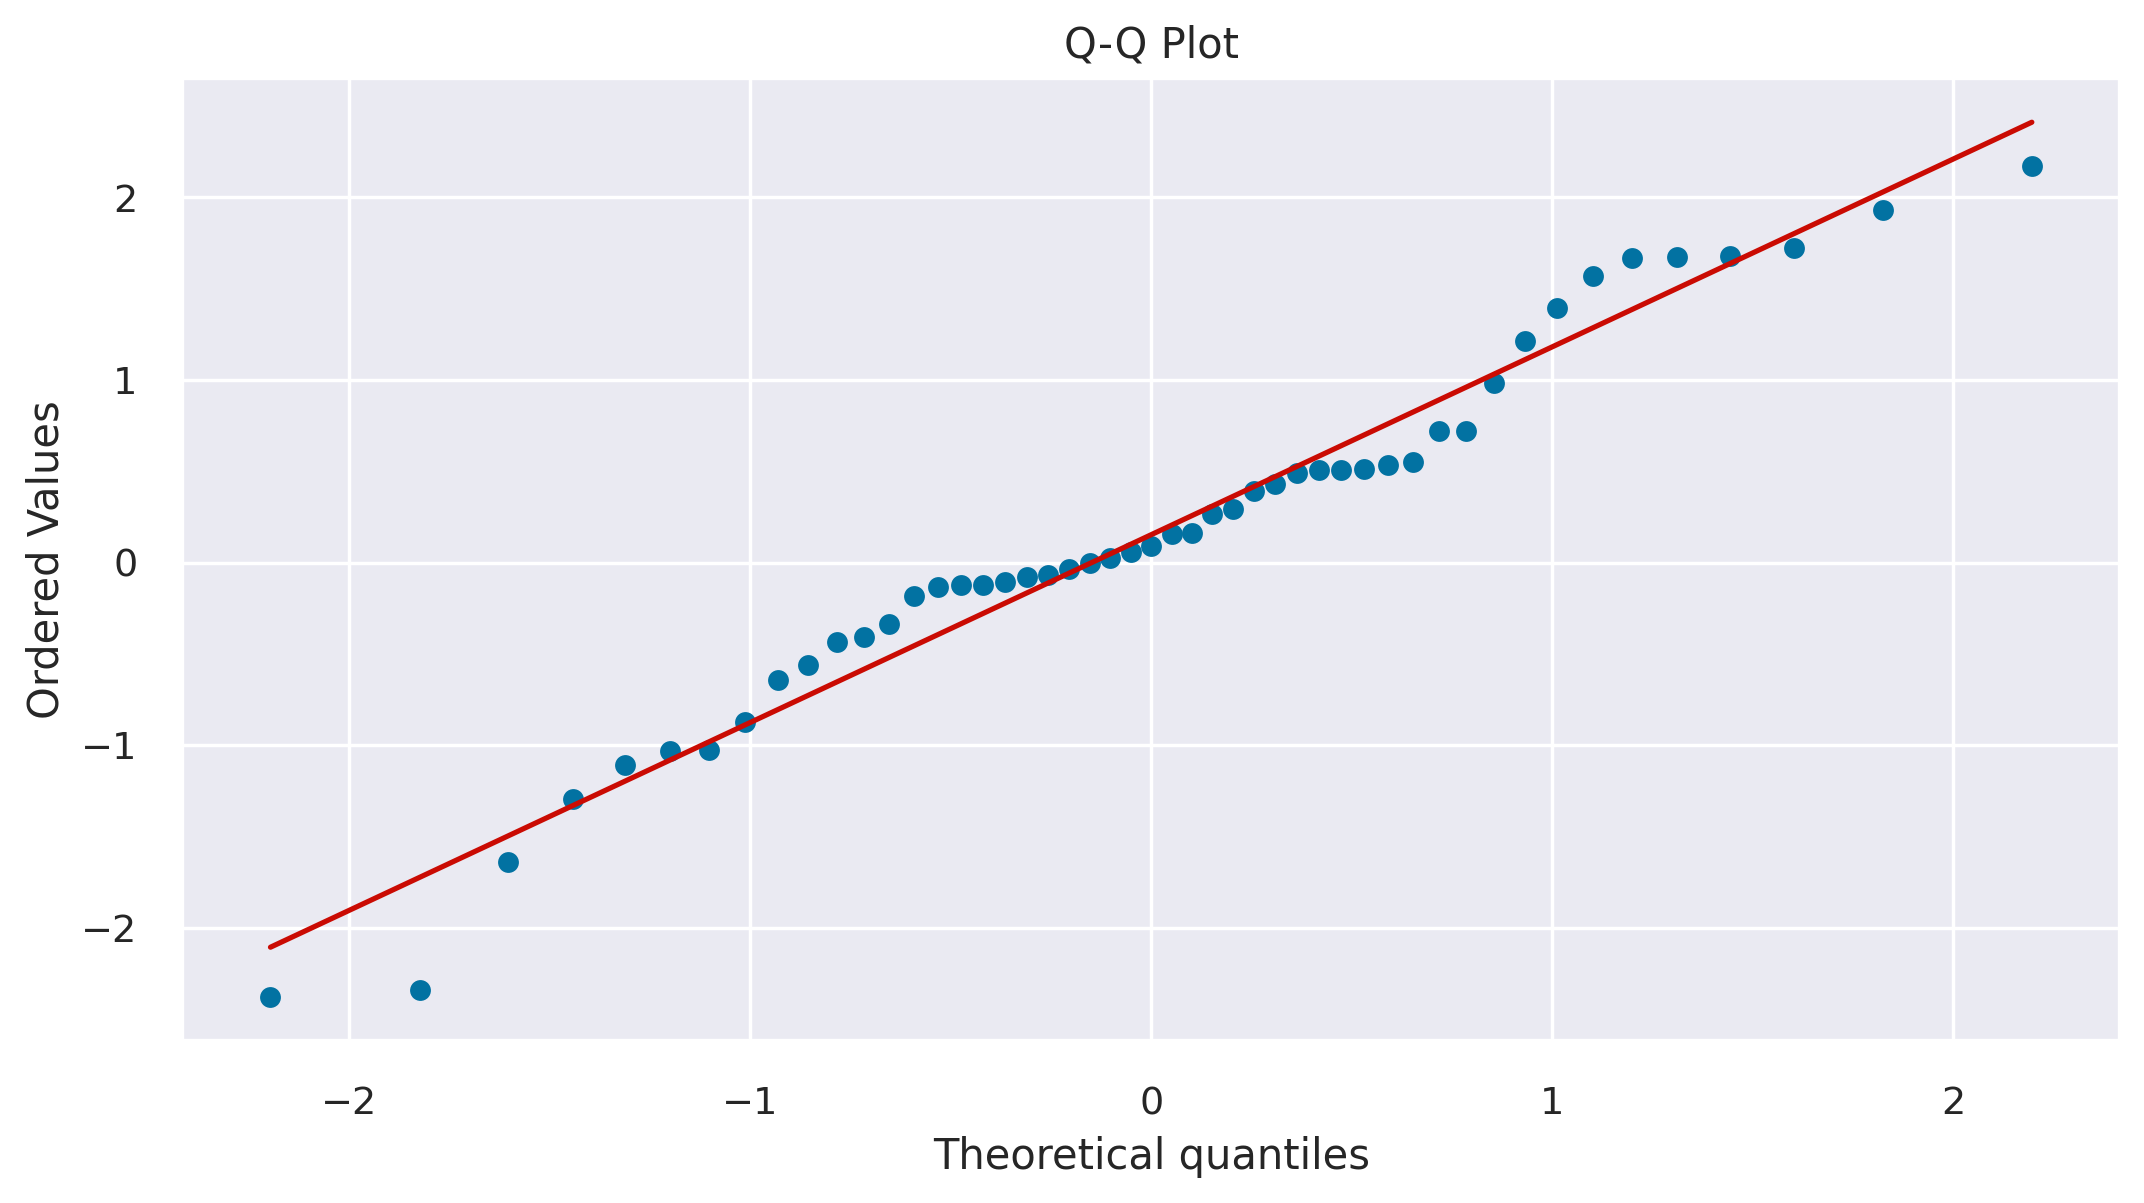

In [ ]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')